# model test

## Tensorized

In [1]:
def my_func():
    a = 1
    b = 2
    c = 3
    return (a,b),c

x = my_func()
print(x)
y1, _ = my_func()
print(y1)
z1, z2, z3 = my_func()
print(z1,z2,z3)
    

((1, 2), 3)
(1, 2)


ValueError: not enough values to unpack (expected 3, got 2)

In [8]:
import ast

temp = '{0 : 1,100 : 2,200 : 3}'
temp_list = ast.literal_eval(temp)

print(type(temp_list))
print(temp_list)

<class 'dict'>
{0: 1, 100: 2, 200: 3}


## FO ZO grad norm and grad error

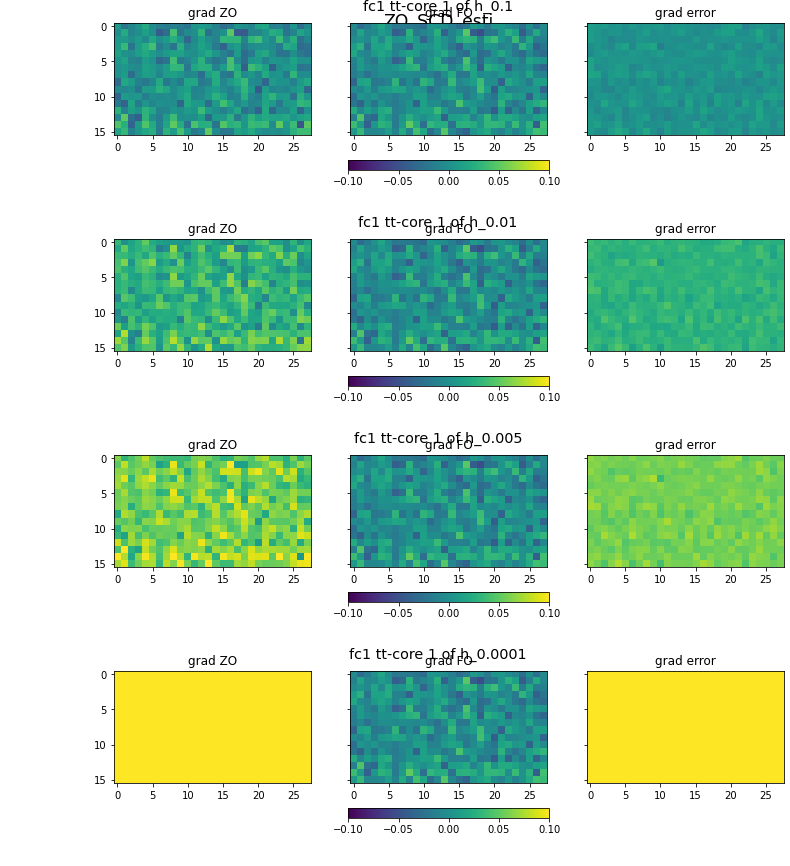

In [83]:
import os
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

shape1 = [[4,7,7,4], [4,4,4,4]]   
shape2 = [[4,4,4,4], [1,5,2,1]] 
tt_rank = [1,4,4,4,1]

optimizer_name = 'ZO_SCD_esti'
# h_smooth = 0.008
h_smooths = [0.1, 0.01, 0.005, 0.0001]

fig = plt.figure(figsize=(12, 3*len(h_smooths)))
subfigs = fig.subfigures(len(h_smooths), 1, wspace=0.07)
fig.suptitle(optimizer_name, fontsize='xx-large')

for idx, h_smooth in enumerate(h_smooths):
    grads_path=os.path.join('./figs/' + optimizer_name + '/h_'+str(h_smooth)+'.pth')
    grads = torch.load(grads_path)

    subfigs[idx].suptitle('fc1 tt-core 1 of ' + 'h_'+str(h_smooth), fontsize='x-large')
    axs = subfigs[idx].subplots(1, 3, sharey=True)
    
# optimizer_name = 'ZO_SGD_mask'
# # n_sample = 100
# n_samples = [100,1000,10000,100000]

# fig = plt.figure(figsize=(12, 3*len(n_samples)))
# subfigs = fig.subfigures(len(n_samples), 1, wspace=0.07)
# fig.suptitle(optimizer_name, fontsize='xx-large')

# for idx, n_sample in enumerate(n_samples):
#     grads_path=os.path.join('./figs/' + optimizer_name + '/N_'+str(n_sample)+'.pth')
#     grads = torch.load(grads_path)
    
#     axs = subfigs[idx].subplots(1, 3)
#     subfigs[idx].suptitle('fc1 tt-core 1 of ' + 'N_'+str(n_sample), fontsize='x-large')
    
    grads_zo = grads[0]
    grads_fo = grads[1]
    grads_err = grads[2]

    # ================= Single TT-core =================
    tt_size=(16,28)
    grad_zo = grads_zo['fc1']['1'].cpu().numpy().reshape(tt_size)
    grad_fo = grads_fo['fc1']['1'].cpu().numpy().reshape(tt_size)
    grad_err = grads_err['fc1']['1'].cpu().numpy().reshape(tt_size)

    # vmin = np.min(grad_err)
    # vmax = np.max(grad_err)

    vmin = -0.1
    vmax = 0.1

    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

    # Plot matrices on subplots
    for ax, mat in zip(axs.flat, [grad_zo, grad_fo, grad_err]):
        im = ax.imshow(mat, cmap='viridis', vmin=vmin, vmax=vmax)
        # im = ax.contourf(mat,cmap = plt.cm.coolwarm,norm = norm)

    # fig.colorbar(im, ax=axs[-1], shrink=1/axs.shape[0])

    # Add titles to subplots
    for ax, title in zip(axs.flat, ['grad ZO', 'grad FO', 'grad error']):
        ax.set_title(title)

    # l = 0.95
    # b = 0.12
    # w = 0.015
    # h = 1 - 4*b 
    # cb_ax = subfigs[idx].add_axes([l,b,w,h]) #设置colarbar位置
    # cbar = subfigs[idx].colorbar(im, cax=cb_ax)     #共享colorbar

    subfigs[idx].colorbar(im, ax=axs, shrink=0.3, location='bottom')

    # fig.suptitle('fc1 tt-core 1 of ' + 'N_'+str(n_sample))
# plt.tight_layout()
plt.show()

# ================= Multiple TT-core =================

# for layer_name, layer in grads_zo.items():
#     for p_name, p in layer.items():
#         size_x = int(np.sqrt(len(p)))
#         # size_y = int(p.numel()/size_x)
#         grad_zo = np.reshape(grads_zo[layer_name][p_name].cpu().numpy(), (-1, size_x))
#         grad_zo = grads_zo[layer_name][p_name].cpu().numpy().reshape((size_x,-1))
#         grad_fo = grads_fo[layer_name][p_name].cpu().numpy().reshape((size_x,-1))
#         grad_err = grads_err[layer_name][p_name].cpu().numpy().reshape((size_x,-1))

#         fig = plt.figure()
#         fig, axs = plt.subplots(1, 3, figsize=(9, 3))

#         # Plot matrices on subplots
#         for ax, mat in zip(axs.flat, [grad_zo, grad_fo, grad_err]):
#             im = ax.imshow(mat, cmap='viridis')
#             fig.colorbar(im, ax=ax, shrink=1.0/axs.shape[0])

#         # Add titles to subplots
#         for ax, title in zip(axs.flat, ['grad ZO', 'grad FO', 'grad error']):
#             ax.set_title(title)

#         fig.suptitle(layer_name+' '+p_name)
#         plt.show()

## FO ZO grad of each slice

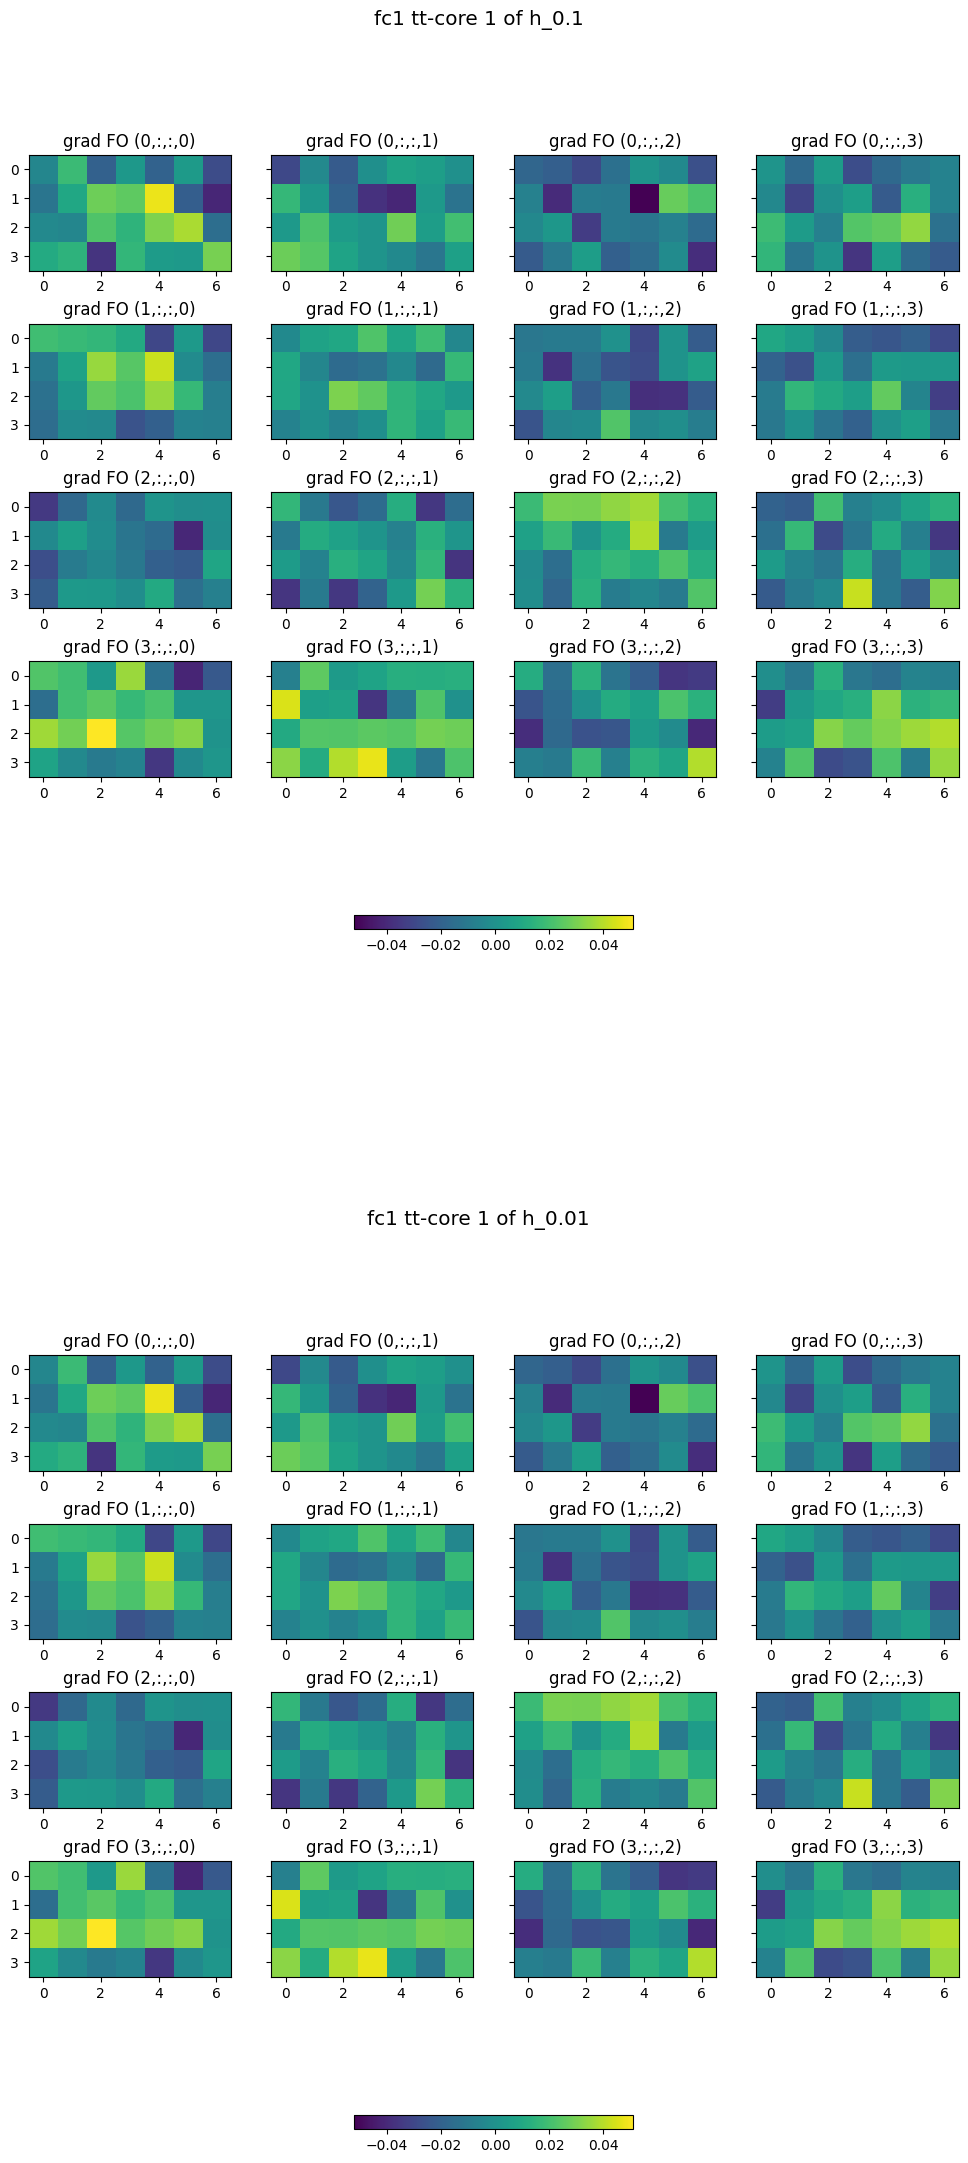

In [7]:
import os
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

shape1 = [[4,7,7,4], [4,4,4,4]]   
shape2 = [[4,4,4,4], [1,5,2,1]] 
tt_rank = [1,4,4,4,1]

network = 'ttm'
optimizer_name = 'ZO_SCD_esti'
data_path = 'figs/ttm/ZO_SCD_esti/inc_adam_bz128_lr0.1_h0.1_grad0/'
h_smooths = [0.1, 0.01]
# h_smooths = [0.1, 0.01, 0.005, 0.0001]

fig = plt.figure(figsize=(12, 12*len(h_smooths)))
subfigs = fig.subfigures(len(h_smooths), 1, wspace=0.07)
fig.suptitle(optimizer_name, fontsize='xx-large')

for idx, h_smooth in enumerate(h_smooths):
    grads_path=os.path.join(data_path + 'h_'+str(h_smooth)+'.pth')
    grads = torch.load(grads_path)
    
# optimizer_name = 'ZO_SGD_mask'
# # n_sample = 100
# n_samples = [100,1000,10000,100000]

# fig = plt.figure(figsize=(12, 3*len(n_samples)))
# subfigs = fig.subfigures(len(n_samples), 1, wspace=0.07)
# fig.suptitle(optimizer_name, fontsize='xx-large')

# for idx, n_sample in enumerate(n_samples):
#     grads_path=os.path.join('./figs/' + network + optimizer_name + '/N_'+str(n_sample)+'.pth')
#     grads = torch.load(grads_path)
    
    grads_zo = grads[0]
    grads_fo = grads[1]
    grads_err = grads[2]

    # ================= Single TT-core =================
    tt_size=(4,4,7,4)

    subfigs[idx].suptitle('fc1 tt-core 1 of ' + 'h_'+str(h_smooth), fontsize='x-large')
    axs = subfigs[idx].subplots(tt_size[0], tt_size[-1], sharey=True)

    grad_zo = grads_zo['fc1']['1'].cpu().numpy().reshape(tt_size)
    grad_fo = grads_fo['fc1']['1'].cpu().numpy().reshape(tt_size)
    grad_err = grads_err['fc1']['1'].cpu().numpy().reshape(tt_size)

    grad_fo_slices = []
    for i in range(tt_size[0]):
        for j in range(tt_size[-1]):
            grad_fo_slices.append(grad_fo[i,:,:,j])

    vmin = np.min(grad_fo)
    vmax = np.max(grad_fo)

    # vmin = -0.1
    # vmax = 0.1

    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

    # Plot matrices on subplots
    for ax, mat in zip(axs.flat, grad_fo_slices):
        im = ax.imshow(mat, cmap='viridis', vmin=vmin, vmax=vmax)
        # im = ax.contourf(mat,cmap = plt.cm.coolwarm,norm = norm)

    # fig.colorbar(im, ax=axs[-1], shrink=1/axs.shape[0])

    # Add titles to subplots
    for i in range(tt_size[0]):
        for j in range(tt_size[-1]):
            axs[i][j].set_title('grad FO ({},:,:,{})'.format(i,j))
            grad_fo_slices.append(grad_fo[i,:,:,j])

    # l = 0.95
    # b = 0.12
    # w = 0.015
    # h = 1 - 4*b 
    # cb_ax = subfigs[idx].add_axes([l,b,w,h]) #设置colarbar位置
    # cbar = subfigs[idx].colorbar(im, cax=cb_ax)     #共享colorbar

    subfigs[idx].colorbar(im, ax=axs, shrink=0.3, location='bottom')

    # fig.suptitle('fc1 tt-core 1 of ' + 'N_'+str(n_sample))
# plt.tight_layout()
plt.show()